# Intro
This notebook shows an overview of the following datasets: movie.metadata, character.metadata, plot_summaries
# Cleaning

In [38]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import ast

from cleaning import clean_movie_metadata
from cleaning import clean_character_metadata

current_directory = os.getcwd()
data_directory = os.path.join(current_directory, 'Data')


#clean_all_datasets(data_directory)
#tvtropes_cleaned, name_clusters_cleaned, character_metadata_cleaned, plot_summaries_cleaned, movie_metadata_cleaned = clean_all_datasets(data_directory)

# Movie metadata
Date, box office, length, languages, country of origin, genre
## Movies
### Number per year
Continuous graph

## Number of movies released per year
Continuous graph


Cleaned Movie Metadata dataset:
   movie_id                                         movie_name  \
0    975900                                     Ghosts of Mars   
1   3196793  Getting Away with Murder: The JonBenét Ramsey ...   
2  28463795                                        Brun bitter   
3   9363483                                   White Of The Eye   
4    261236                                  A Woman in Flames   

            countries_clean  \
0  United States of America   
1  United States of America   
2                    Norway   
3            United Kingdom   
4                   Germany   

                                        genres_clean languages_clean  
0  Thriller, Science Fiction, Horror, Adventure, ...         English  
1     Mystery, Biographical film, Drama, Crime Drama         English  
2                               Crime Fiction, Drama       Norwegian  
3  Thriller, Erotic thriller, Psychological thriller         English  
4                           

C:\Users\Pierre\AppData\Local\Temp\ipykernel_19172\1306978881.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['revenue'] = pd.to_numeric(df_cleaned['revenue'], errors='coerce')


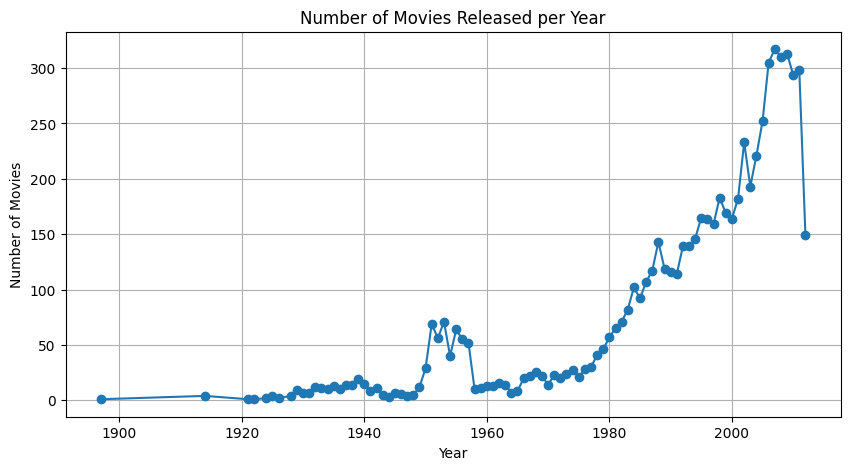

In [39]:
# Clean the dataset
#data_directory = '/your_data_directory'  # Replace with the actual directory path
df_movie_metadata = clean_movie_metadata(data_directory)

# Extract year and filter data for numeric revenue
df_movie_metadata['year'] = pd.to_datetime(df_movie_metadata['release_date'], errors='coerce').dt.year
df_cleaned = df_movie_metadata.dropna(subset=['year', 'revenue'])
df_cleaned['revenue'] = pd.to_numeric(df_cleaned['revenue'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['revenue'])

# Plot 1: Number of Movies Released per Year
movies_per_year = df_cleaned.groupby('year').size()
plt.figure(figsize=(10, 5))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

## Box office
### Availability of data
Number

In [48]:
# Calculate the proportion of movies with box office revenue available
total_movies = df_movie_metadata.shape[0]
movies_with_revenue = df_movie_metadata['revenue'].notna().sum()
proportion_with_revenue = movies_with_revenue / total_movies

print(f"Proportion of movies with box office revenue available: {proportion_with_revenue:.2%}")

Proportion of movies with box office revenue available: 10.28%


### Mean std & median per year
continuous graph

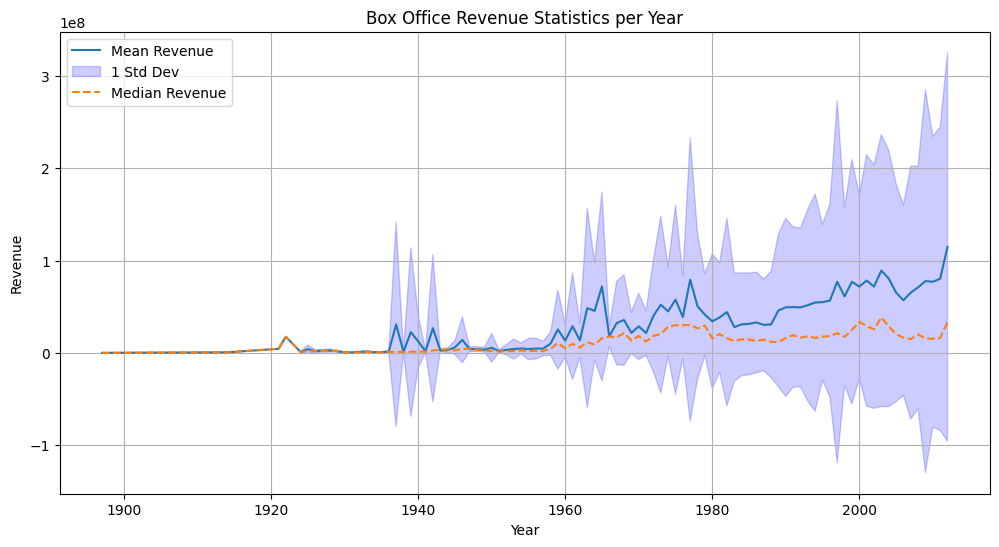

In [40]:
revenue_stats = df_cleaned.groupby('year')['revenue'].agg(['mean', 'std', 'median'])
plt.figure(figsize=(12, 6))
plt.plot(revenue_stats.index, revenue_stats['mean'], label='Mean Revenue')
plt.fill_between(revenue_stats.index, revenue_stats['mean'] - revenue_stats['std'],
                 revenue_stats['mean'] + revenue_stats['std'], color='b', alpha=0.2, label='1 Std Dev')
plt.plot(revenue_stats.index, revenue_stats['median'], label='Median Revenue', linestyle='--')
plt.title('Box Office Revenue Statistics per Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

### Total per year

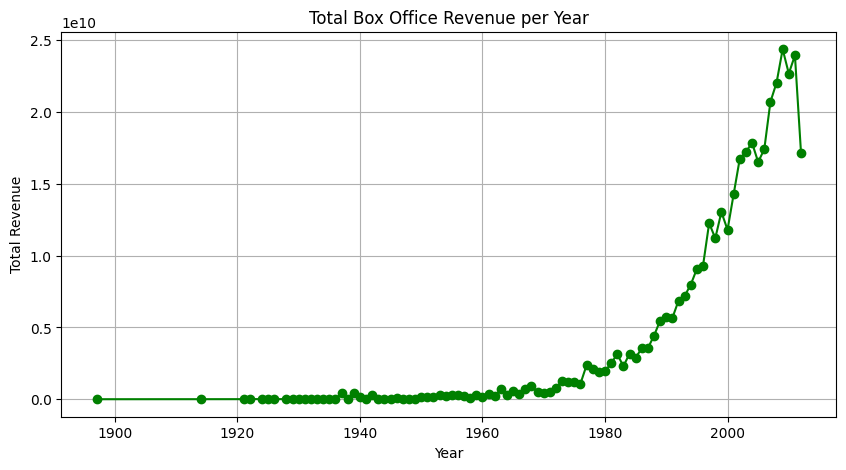

In [41]:
# Plot: Total Box Office Revenue per Year
total_revenue_per_year = df_cleaned.groupby('year')['revenue'].sum()

plt.figure(figsize=(10, 5))
plt.plot(total_revenue_per_year.index, total_revenue_per_year.values, marker='o', color='green')
plt.title('Total Box Office Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Languages

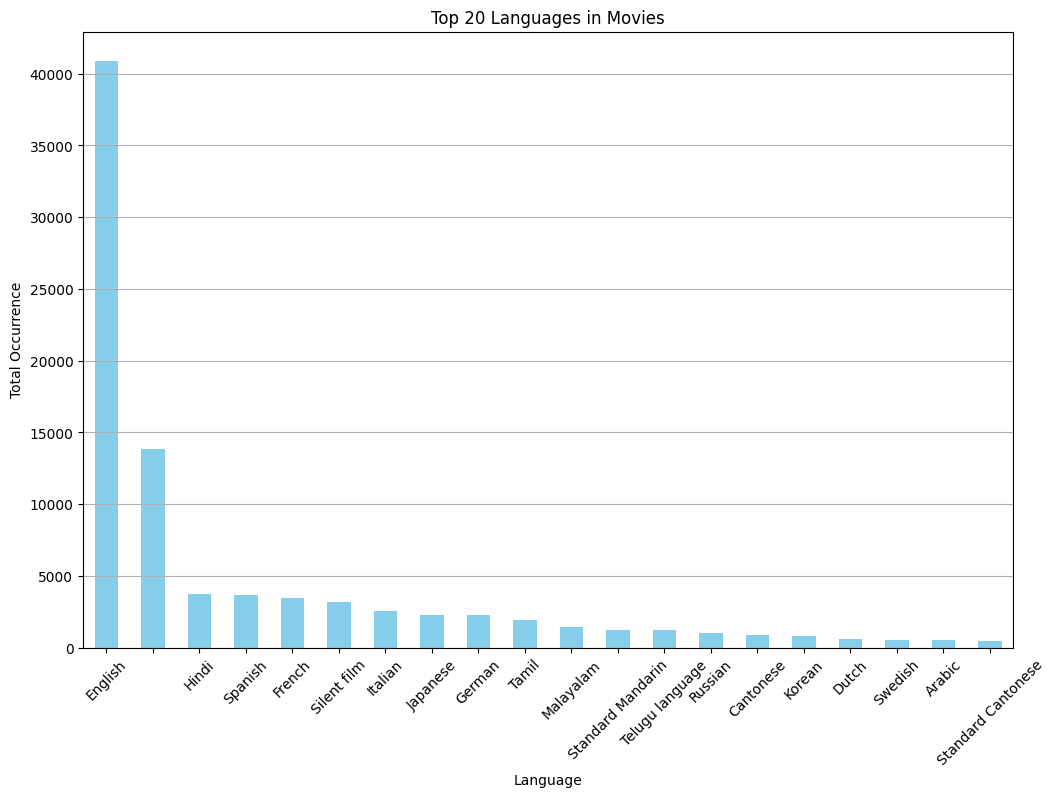

In [42]:
# Split the languages and explode the dataframe to count each language separately
df_languages = df_movie_metadata['languages_clean'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_languages.name = 'language'

# Count the occurrences of each language
language_counts = df_languages.value_counts().head(20)

# Plot the bar plot
plt.figure(figsize=(12, 8))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Top 20 Languages in Movies')
plt.xlabel('Language')
plt.ylabel('Total Occurrence')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\Pierre\AppData\Local\Temp\ipykernel_19172\81311365.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, total_movies)


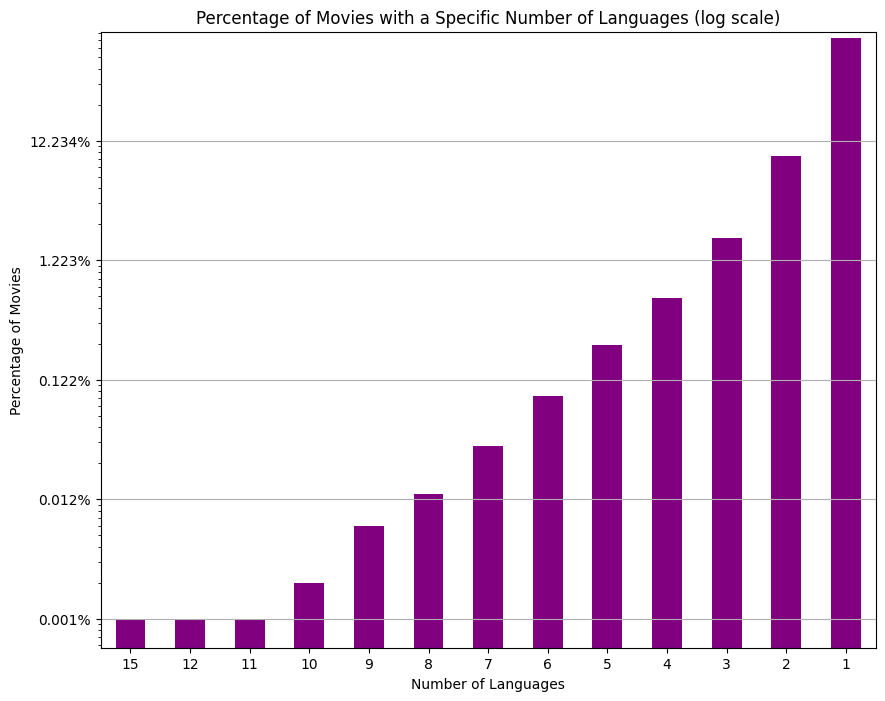

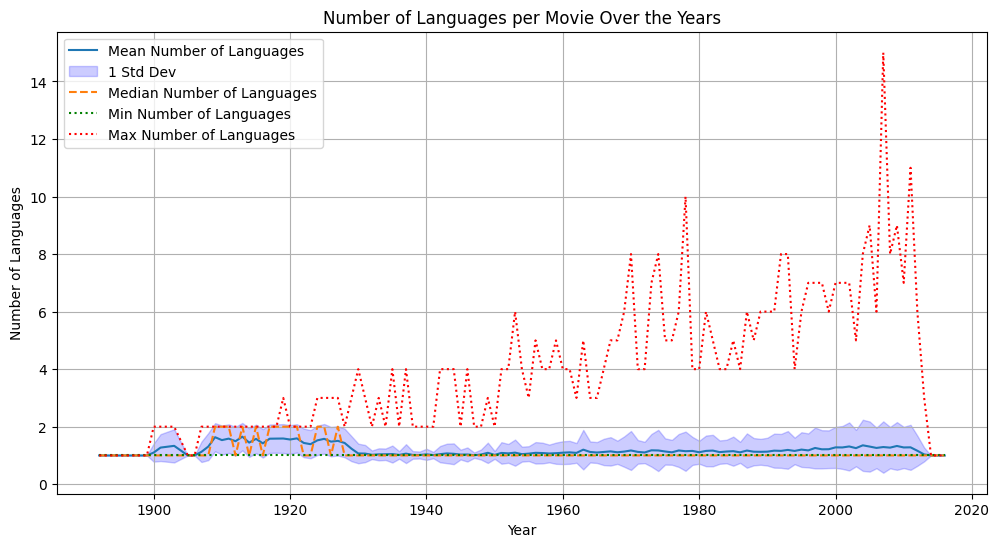

In [43]:
from matplotlib.ticker import FuncFormatter

# Count the number of languages per movie
df_movie_metadata['num_languages'] = df_movie_metadata['languages_clean'].str.split(', ').apply(len)
num_languages_counts = df_movie_metadata['num_languages'].value_counts().sort_index(ascending=True)

# Ensure movies with the most languages are present on the plot
num_languages_counts = num_languages_counts.sort_index(ascending=False)

# Plot: Number of Movies with a Specific Number of Languages
plt.figure(figsize=(10, 8))
num_languages_counts.plot(kind='bar', color='purple')
plt.title('Percentage of Movies with a Specific Number of Languages (log scale)')
plt.xlabel('Number of Languages')
plt.ylabel('Percentage of Movies')
plt.yscale('log')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Format y-axis as percentage with 2 decimals
total_movies = num_languages_counts.sum()
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.3%}'.format(y / total_movies)))

# Limit y-axis to 100%
plt.ylim(0, total_movies)

plt.show()
# Group by year and calculate mean, std, median, min, and max of num_languages
languages_stats = df_movie_metadata.groupby('year')['num_languages'].agg(['mean', 'std', 'median', 'min', 'max']).dropna()

# Plot the statistics
plt.figure(figsize=(12, 6))
plt.plot(languages_stats.index, languages_stats['mean'], label='Mean Number of Languages')
plt.fill_between(languages_stats.index, languages_stats['mean'] - languages_stats['std'],
                 languages_stats['mean'] + languages_stats['std'], color='b', alpha=0.2, label='1 Std Dev')
plt.plot(languages_stats.index, languages_stats['median'], label='Median Number of Languages', linestyle='--')
plt.plot(languages_stats.index, languages_stats['min'], label='Min Number of Languages', linestyle=':', color='green')
plt.plot(languages_stats.index, languages_stats['max'], label='Max Number of Languages', linestyle=':', color='red')
plt.title('Number of Languages per Movie Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Languages')
plt.legend()
plt.grid(True)
plt.show()

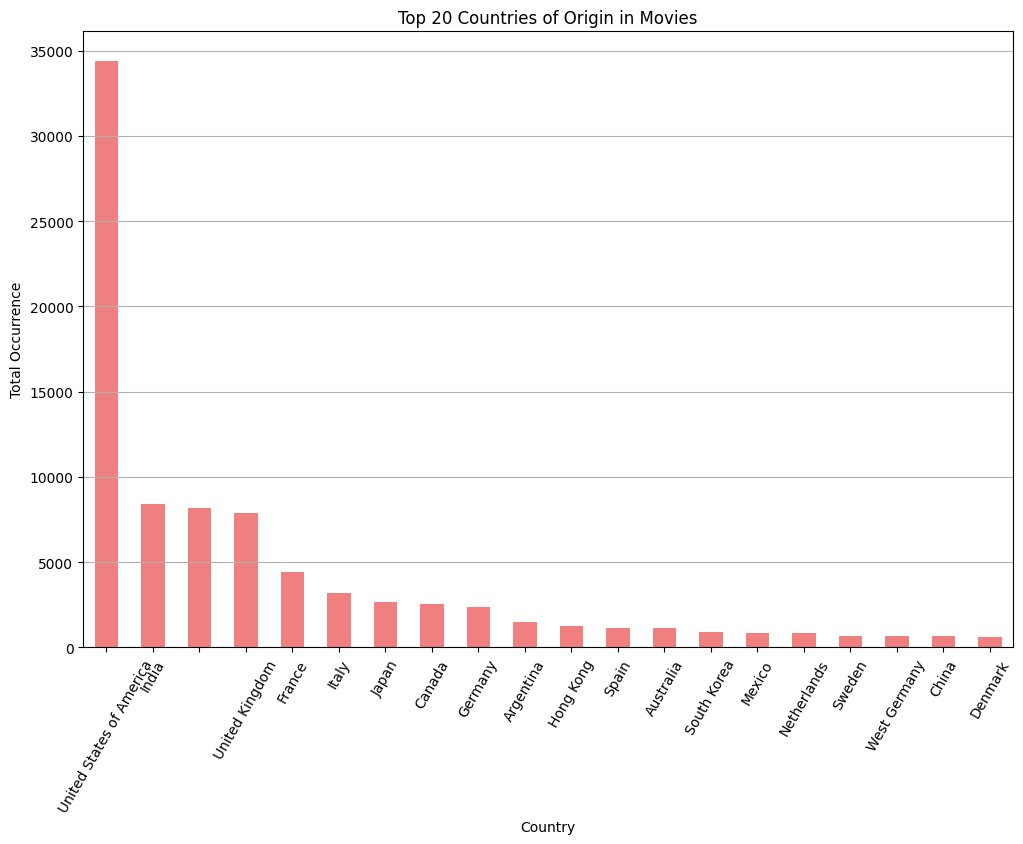

In [44]:
# Split the countries and explode the dataframe to count each country separately
df_countries = df_movie_metadata['countries_clean'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_countries.name = 'countries_clean'

# Count the occurrences of each country
country_counts = df_countries.value_counts().head(20)

# Plot the bar plot
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 20 Countries of Origin in Movies')
plt.xlabel('Country')
plt.ylabel('Total Occurrence')
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.show()

# Actors

In [45]:
df_character_metadata = clean_character_metadata(data_directory)



Cleaned Character Metadata dataset:
  movie_id freebase_id release_date              character_name   actor_dob  \
0   975900   /m/03vyhn   2001-08-24                    Akooshay  1958-08-26   
1   975900   /m/03vyhn   2001-08-24  Lieutenant Melanie Ballard  1974-08-15   
2   975900   /m/03vyhn   2001-08-24         Desolation Williams  1969-06-15   
3   975900   /m/03vyhn   2001-08-24          Sgt Jericho Butler  1967-09-12   
4   975900   /m/03vyhn   2001-08-24             Bashira Kincaid  1977-09-25   

  actor_gender  actor_height actor_ethnicity          actor_name  actor_age  \
0            F         1.620             NaN      Wanda De Jesus       42.0   
1            F         1.780      /m/044038p  Natasha Henstridge       27.0   
2            M         1.727         /m/0x67            Ice Cube       32.0   
3            M         1.750             NaN       Jason Statham       33.0   
4            F         1.650             NaN         Clea DuVall       23.0   

             

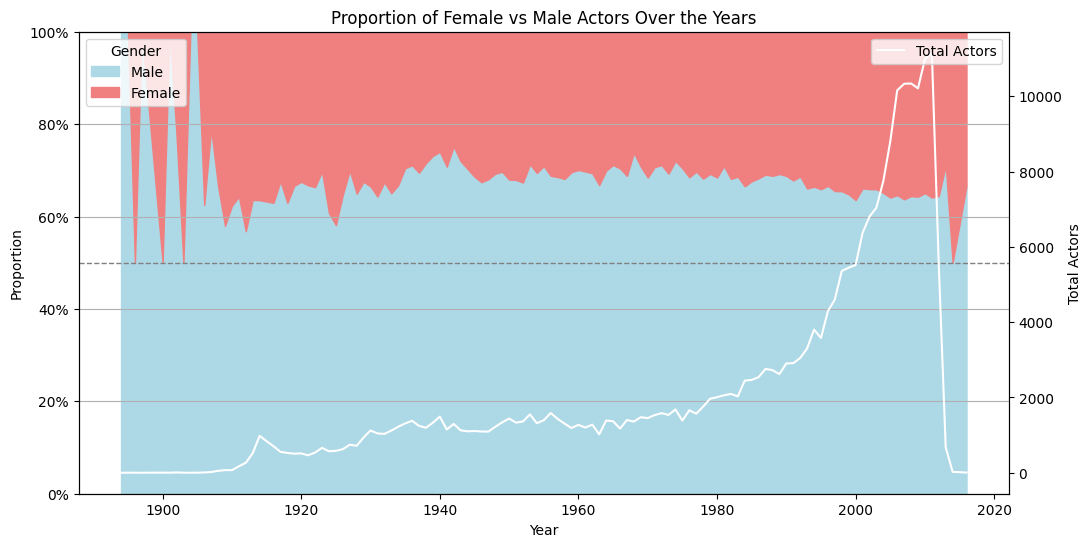

In [46]:
# Extract year from release_date and filter out rows with missing actor_gender
df_character_metadata['year'] = pd.to_datetime(df_character_metadata['release_date'], errors='coerce').dt.year
df_gender_year = df_character_metadata.dropna(subset=['year', 'actor_gender'])

# Group by year and actor_gender to count occurrences
gender_counts_per_year = df_gender_year.groupby(['year', 'actor_gender']).size().unstack(fill_value=0)

# Calculate the proportion of female and male actors per year
gender_proportion_per_year = gender_counts_per_year.div(gender_counts_per_year.sum(axis=1), axis=0)

# Calculate the total number of actors per year
total_actors_per_year = gender_counts_per_year.sum(axis=1)

# Plot the proportions as an all-painted graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate the proportion of male actors per year
male_proportion_per_year = gender_proportion_per_year['M']

# Plot the proportion of male actors as a line graph
ax1.fill_between(gender_proportion_per_year.index, 0, gender_proportion_per_year['M'], color='lightblue', label='Male')
ax1.fill_between(gender_proportion_per_year.index, gender_proportion_per_year['M'], 1, color='lightcoral', label='Female')
ax1.axhline(0.5, color='gray', linestyle='--', linewidth=1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)
ax1.legend(loc='upper left', title='Gender')
ax1.grid(axis='y')

# Format y-axis as percentage
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Create a second y-axis to plot the total number of actors per year
ax2 = ax1.twinx()
ax2.plot(total_actors_per_year.index, total_actors_per_year.values, color='white', label='Total Actors', linestyle='-')
ax2.set_ylabel('Total Actors')
ax2.legend(loc='upper right')

plt.title('Proportion of Female vs Male Actors Over the Years')
plt.show()

test

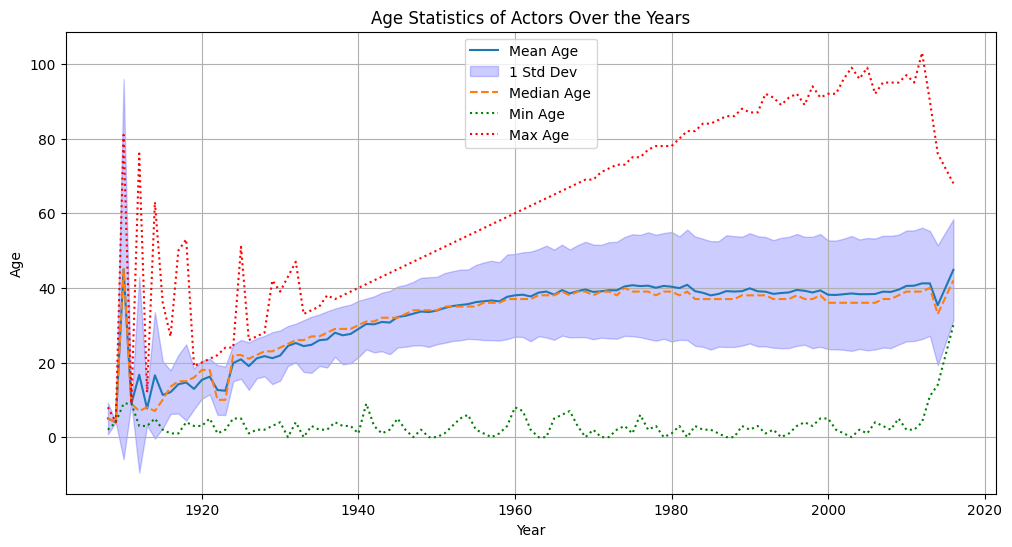

In [47]:
# Group by year and calculate mean, std, median, min, and max of actor_age
age_stats = df_character_metadata.groupby('year')['actor_age'].agg(['mean', 'std', 'median', 'min', 'max']).dropna()

# Plot the statistics
plt.figure(figsize=(12, 6))
plt.plot(age_stats.index, age_stats['mean'], label='Mean Age')
plt.fill_between(age_stats.index, age_stats['mean'] - age_stats['std'],
                 age_stats['mean'] + age_stats['std'], color='b', alpha=0.2, label='1 Std Dev')
plt.plot(age_stats.index, age_stats['median'], label='Median Age', linestyle='--')
plt.plot(age_stats.index, age_stats['min'], label='Min Age', linestyle=':', color='green')
plt.plot(age_stats.index, age_stats['max'], label='Max Age', linestyle=':', color='red')
plt.title('Age Statistics of Actors Over the Years')
plt.xlabel('Year')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

# Plots

# Correlations
## Revenue/Languages number
## Revenue/